<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

Author: Prof. I-Cheng Yeh
Source: [UCI](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center)
Please cite: Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence", Expert Systems with Applications, 2008.

Blood Transfusion Service Center Data Set
Data taken from the Blood Transfusion Service Center in Hsin-Chu City in Taiwan -- this is a classification problem.

To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build an FRMTC model, we selected 748 donors at random from the donor database.

### Attribute Information
* V1: Recency - months since last donation
* V2: Frequency - total number of donation
* V3: Monetary - total blood donated in c.c.
* V4: Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).

The target attribute is a binary variable representing whether he/she donated blood in March 2007 (2 stands for donating blood; 1 stands for not donating blood).

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

In [90]:
import pandas as pd
import seaborn as sn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

In [91]:
data = pd.read_csv('blood.csv')

In [18]:
data.head(10)

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1
5,4,4,1000,4,1
6,2,7,1750,14,2
7,1,12,3000,35,1
8,2,9,2250,22,2
9,5,46,11500,98,2


In [19]:
data.tail()

,V1,V2,V3,V4,Class
743,23,2,500,38,1
744,21,2,500,52,1
745,23,3,750,62,1
746,39,1,250,39,1
747,72,1,250,72,1


In [20]:
data.describe()

,V1,V2,V3,V4,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,1.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,1.000000
25%,2.750000,2.000000,500.000000,16.000000,1.000000
50%,7.000000,4.000000,1000.000000,28.000000,1.000000
75%,14.000000,7.000000,1750.000000,50.000000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,2.000000


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      748 non-null    int64
 1   V2      748 non-null    int64
 2   V3      748 non-null    int64
 3   V4      748 non-null    int64
 4   Class   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [22]:
print(data.isnull().sum())

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64


# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [92]:
data.head()

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

Attribute Information
V1: Recency - months since last donation
V2: Frequency - total number of donation
V3: Monetary - total blood donated in c.c.
V4: Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).

### Features and Types


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      748 non-null    int64
 1   V2      748 non-null    int64
 2   V3      748 non-null    int64
 3   V4      748 non-null    int64
 4   Class   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


### null Values

In [94]:
print(data.isnull().sum())

V1       0
V2       0
V3       0
V4       0
Class    0
dtype: int64


### Domains, Intervals

<AxesSubplot:>

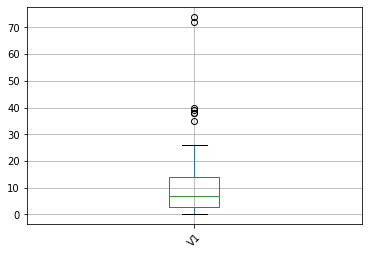

In [95]:
data.boxplot(rot=45, column=['V1'])

<AxesSubplot:>

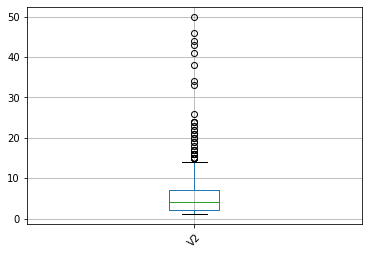

In [96]:
data.boxplot(rot=45, column=['V2'])

<AxesSubplot:>

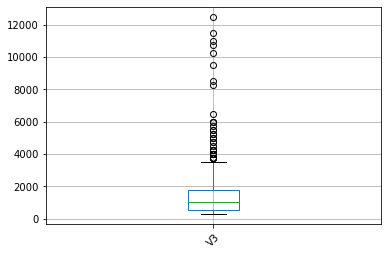

In [97]:
data.boxplot(rot=45, column=['V3'])

<AxesSubplot:>

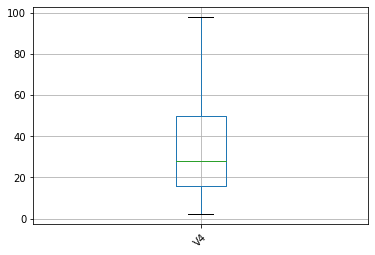

In [98]:
data.boxplot(rot=45, column=['V4'])

### outlier removal

In [27]:
#to remove lower and upper outliers, combine condition with an AND statement:
def remove_outliers(df, column_name):
    q_low = df[column_name].quantile(0.01)
    q_hi  = df[column_name].quantile(0.99)
    df_filtered = df[(df[column_name] < q_hi) & (df[column_name] > q_low)]
    return df_filtered

In [46]:
rec = remove_outliers(rec, 'V3')
rec.count()

Recency (months)                              448
Frequency (times)                             448
Monetary (c.c. blood)                         448
Time (months)                                 448
whether he/she donated blood in March 2007    448
dtype: int64

In [100]:
data_outlier_removed = remove_outliers(data, 'V3')

In [101]:
data_outlier_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 1 to 745
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      582 non-null    int64
 1   V2      582 non-null    int64
 2   V3      582 non-null    int64
 3   V4      582 non-null    int64
 4   Class   582 non-null    int64
dtypes: int64(5)
memory usage: 27.3 KB


<AxesSubplot:>

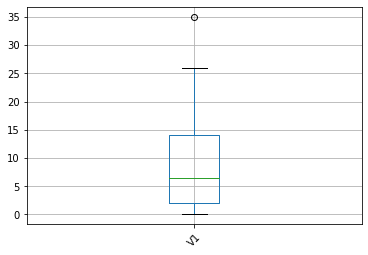

In [103]:
data_outlier_removed.boxplot(rot=45, column=['V1'])

<AxesSubplot:>

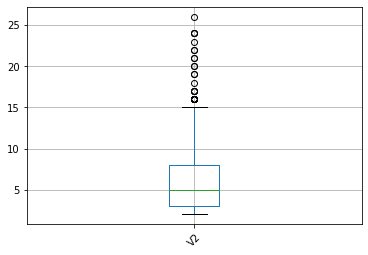

In [104]:
data_outlier_removed.boxplot(rot=45, column=['V2'])

<AxesSubplot:>

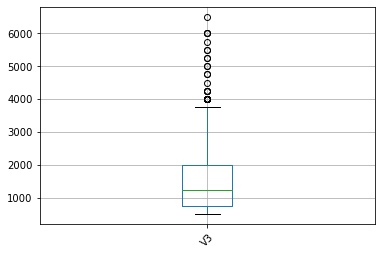

In [105]:
data_outlier_removed.boxplot(rot=45, column=['V3'])

<AxesSubplot:>

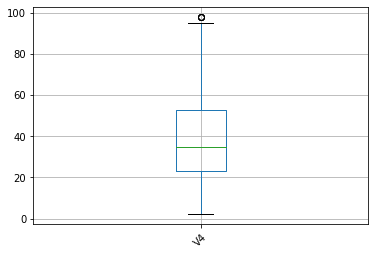

In [106]:
data_outlier_removed.boxplot(rot=45, column=['V4'])

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [107]:
data_outlier_removed.head()

,V1,V2,V3,V4,Class
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1
5,4,4,1000,4,1


In [109]:
from sklearn import preprocessing

x = data_outlier_removed.drop(['Class'], axis=1).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_proccessed = pd.DataFrame(x_scaled)

In [110]:
y = data_outlier_removed['Class'].values

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [111]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [121]:
print(list(y_train).count(1))
print(list(y_train).count(2))


305
102


# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [124]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [139]:
clf = DecisionTreeClassifier(random_state=0, max_depth = 5)

In [140]:
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

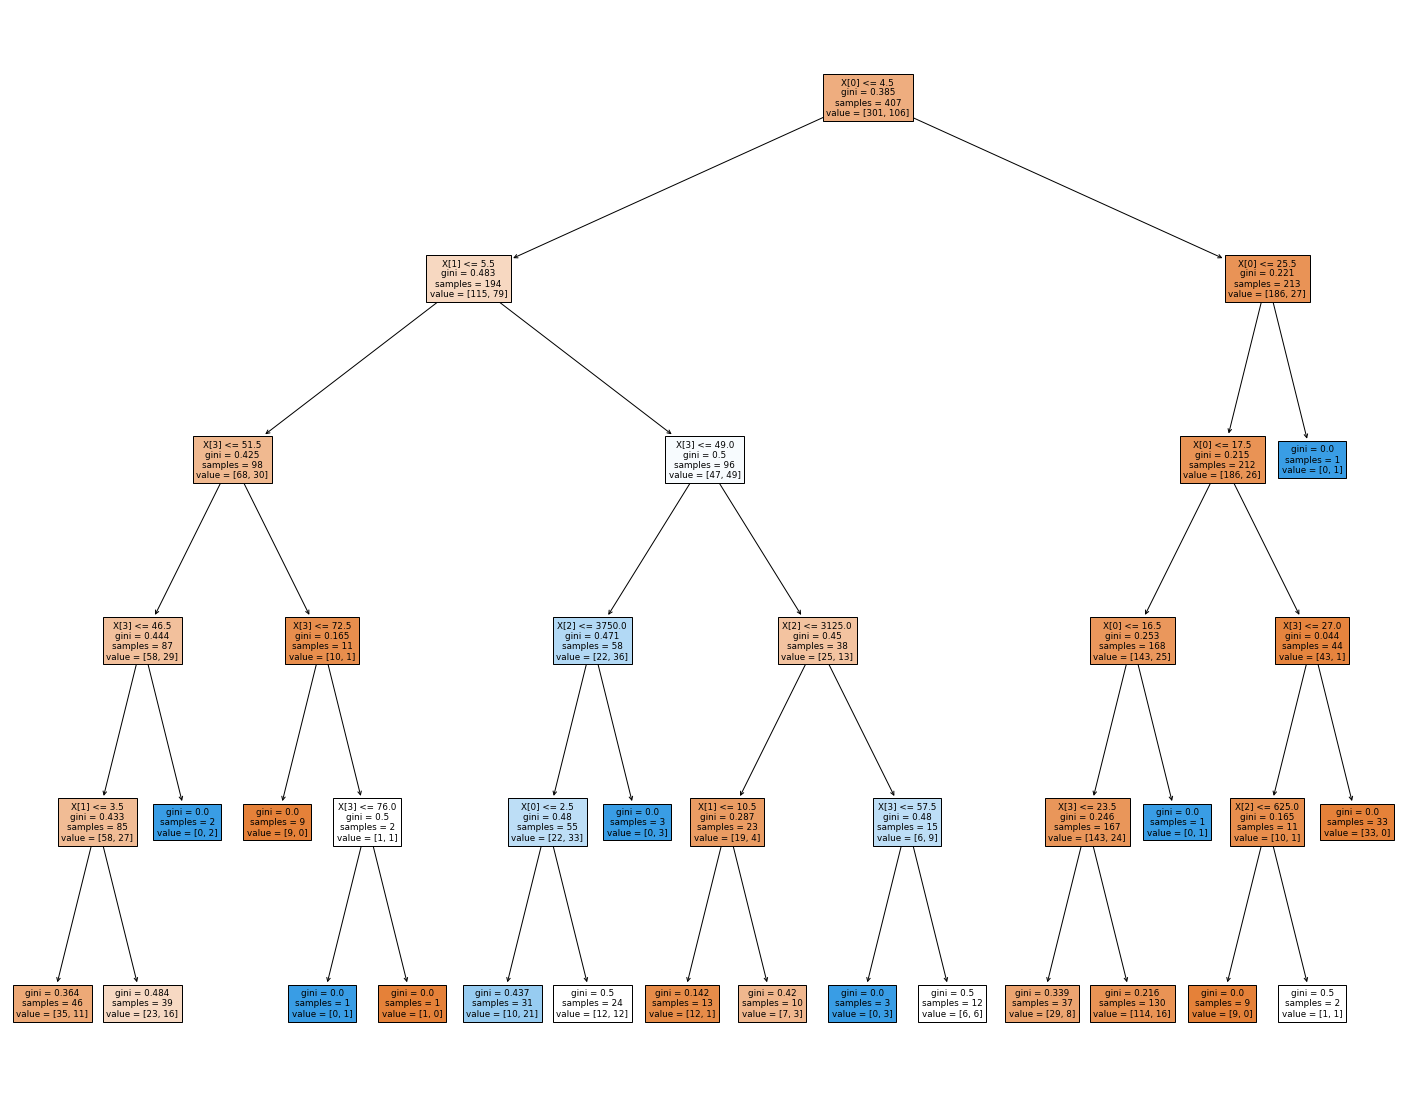

In [141]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   filled=True)

In [159]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_clf.fit(X_train, y_train)

y_ada_pred = ada_clf.predict(X_test)
ada_clf.score(X_test, y_test)

0.7885714285714286

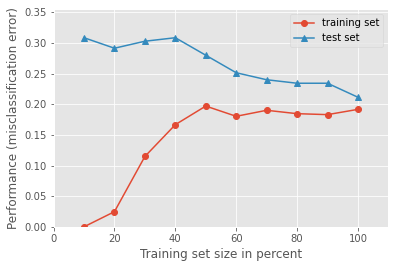

In [151]:
from mlxtend.plotting import plot_learning_curves

plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, ada_clf, print_model = False, style = 'ggplot')
plt.show()

In [153]:
from sklearn.ensemble import BaggingClassifier

In [155]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=10, random_state=0).fit(X_train, y_train)

In [156]:
bag_clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1],
      dtype=int64)

In [160]:
bag_clf.score(X_test, y_test)

0.7885714285714286

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [142]:
#Predict the response for test dataset
y_pred_train = clf.predict(X_train)

In [143]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy: 0.7936117936117936


In [144]:
# Model Accuracy, how often is the classifier correct?
print("auc roc :",metrics.roc_auc_score(y_train, y_pred_train))

auc roc : 0.6343321005453519


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [145]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [128]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [146]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7542857142857143


In [147]:
print("auc roc :",metrics.roc_auc_score(y_test, y_pred))

auc roc : 0.5745702730030333


# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



